# **Week 43 Lab - Water Potability Prediction with FastAPI**

---





The goal of this project is to build a machine learning model to predict whether water is potable (safe to drink) or not, based on its chemical and physical properties.

We use the **Water Potability dataset (Kaggle)**, which contains 3276 water samples with 9 input features and a binary target variable `Potability` (0 = unsafe, 1 = safe).  [(link to the dataset)](https://www.kaggle.com/datasets/adityakadiwal/water-potability/data)

## **About the dataset:**

**The driking water potability dataset** contains physicochemical properties of water samples and a label indicating whether the water is safe to drink:


**- Rows:** 3276 water samples

**- Column** features: 10 chemical / physical properties and target

Features:
1. pH (0–14)  
2. Hardness (mg/L)  
3. Solids (Total Dissolved Solids, ppm)  
4. Chloramines (ppm)  
5. Sulfate (mg/L)  
6. Conductivity (μS/cm)  
7. Organic_carbon (ppm)  
8. Trihalomethanes (μg/L)  
9. Turbidity (NTU)

Target
**10. Target (Probablity)**
- 1 : Potable (Safe to drink)
- 2 : Not potable

---

### **Chosen task:**

For this exercise, we will focus on **Predicting if the water is drinkable or not.**
1) **Load the dataset**
2) **Perform Simple EDA**  
3) **Cleanthe data** (e.g., drop missing values)  
4) **Split into Train/Test sets**  
5) **Train models**
- Logistic Regression, Decision Tree, Random Forest, and XGBoost
6) **Evaluate the models with:**
  - Accuracy, classification report (precision, recall, F1-score)
  - Confusion Metrixs
7) **Reflection on results**








**Why we have to predict this task?**

In the real world:

- Safe drinking water is essential for public health.

- The dataset represents water quality tests and whether the water is safe or not.

- A prediction model can quickly check water quality, helping automate safety monitoring and support decisions for clean water access.

# **#0: Setup**

---



**Import the libaries we will use for this dataset**

In [271]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib, json
from pathlib import Path
import missingno as msno

# **1. Loading the data**

---

In [256]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityakadiwal/water-potability")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'water-potability' dataset.
Path to dataset files: /kaggle/input/water-potability


In [257]:
# Path is already return by Kaggle hub
print("Dataset path:", path)
print("Files:", os.listdir(path))

Dataset path: /kaggle/input/water-potability
Files: ['water_potability.csv']


In [258]:
df = pd.read_csv(os.path.join(path, "water_potability.csv"))
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **2. Simple EDA**

---


In [260]:
# --- Shape and data types ---

In [259]:
df.shape

(3276, 10)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [262]:
# --- Numeric summary ---

In [263]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# --- Missing Value ---

In [264]:
df.isnull().values.any()

np.True_

In [265]:
# count missing value per colunn
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [266]:
df[df.isnull().any(axis=1)].any(axis=1)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


/tmp/ipython-input-1028378507.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v + 0.5, f"{missing_percent[i]}%", ha='center', va='bottom')


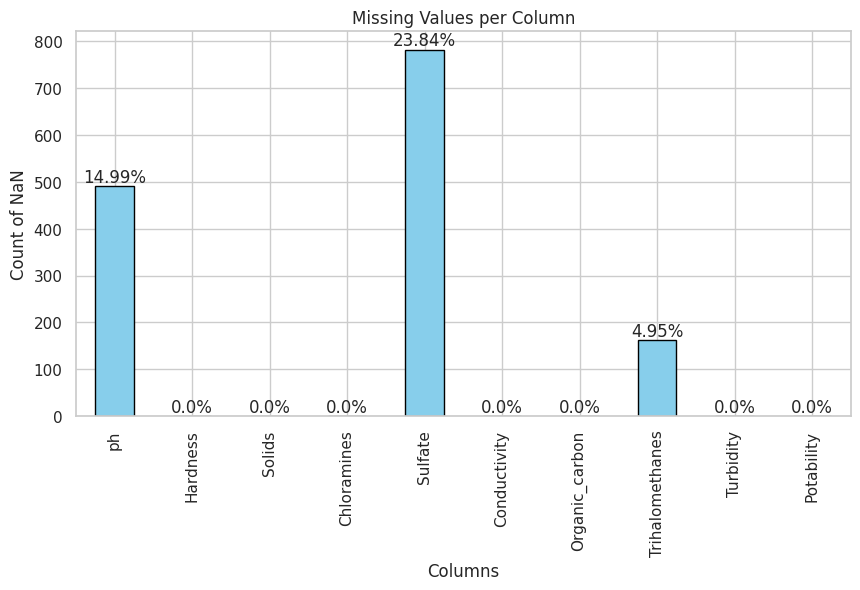

In [268]:
# Calculate missing counts and percentage

missing_count = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

ax = missing_count.plot(kind="bar", figsize=(10,5), color="skyblue", edgecolor="black")
plt.title("Missing Values per Column")
plt.ylabel("Count of NaN")
plt.xlabel("Columns")

for i, v in enumerate(missing_count):
    plt.text(i, v + 0.5, f"{missing_percent[i]}%", ha='center', va='bottom')

plt.show()

<Axes: >

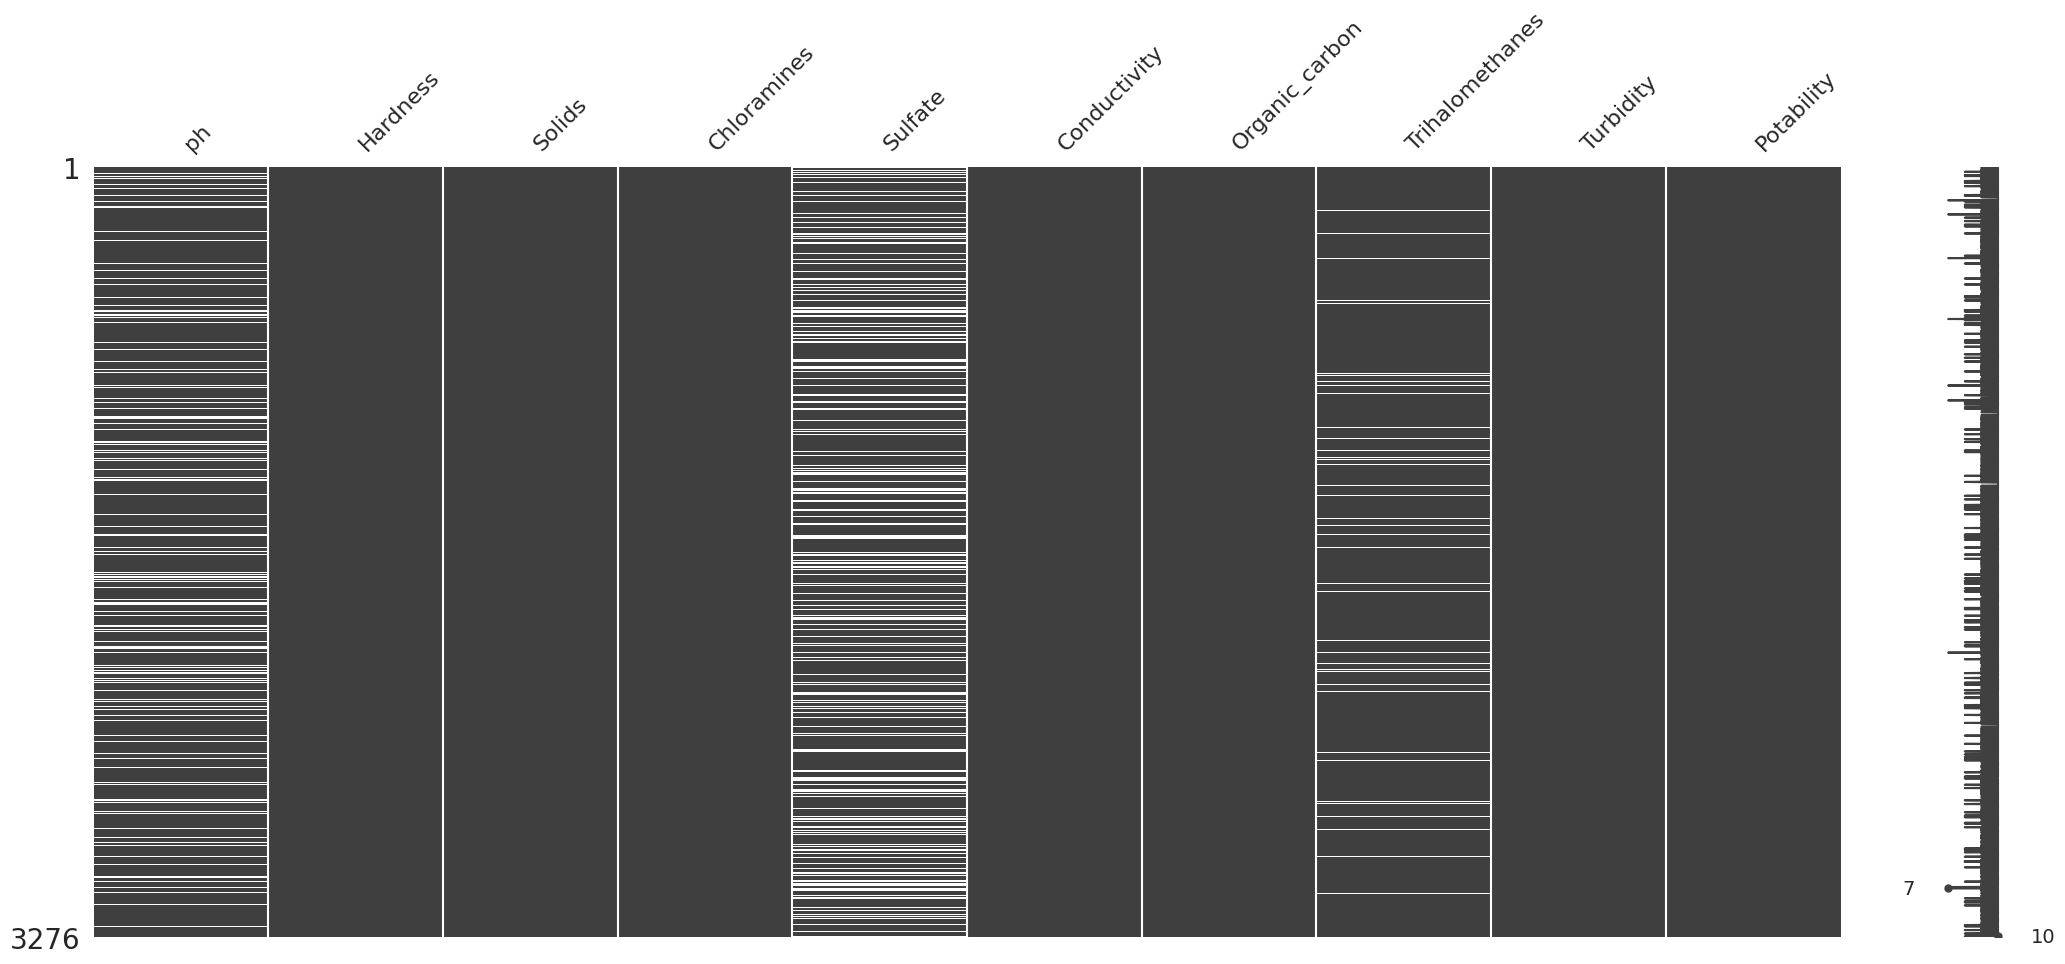

In [272]:
msno.matrix(df)

*   This datset have has a lot of missing values (NaNs), 1,400 rows out of 3,276.
That's why if we just drop rows, we will lose too much data.

In [ ]:
# --- Duplicate value ---

In [273]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [274]:
# --- Data Visualization ---

In [275]:
# The distribution of features  between safe and unsafe water: unsafe(0) and safe(1).
df['Potability'].value_counts(normalize=True)

# Class 0 (Not potable): ~1998 samples
# Class 1 (Potable): ~1278 samples

,proportion
Potability,
0,0.60989
1,0.39011


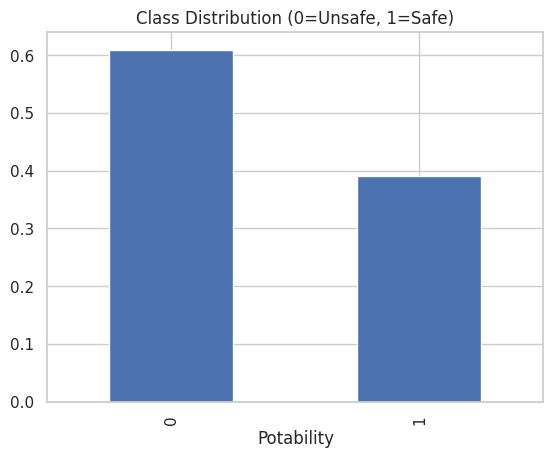

In [276]:
df['Potability'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution (0=Unsafe, 1=Safe)')
plt.show()

*   The dataset has fewer “potable” (safe) water samples than “not potable.” Because of this imbalance, the model often predicts only the majority class. That gives okay accuracy but fails to correctly identify safe water. Balancing fixes this so the model learns both classes.

In [278]:
# --- Observation to see all features distributions ---

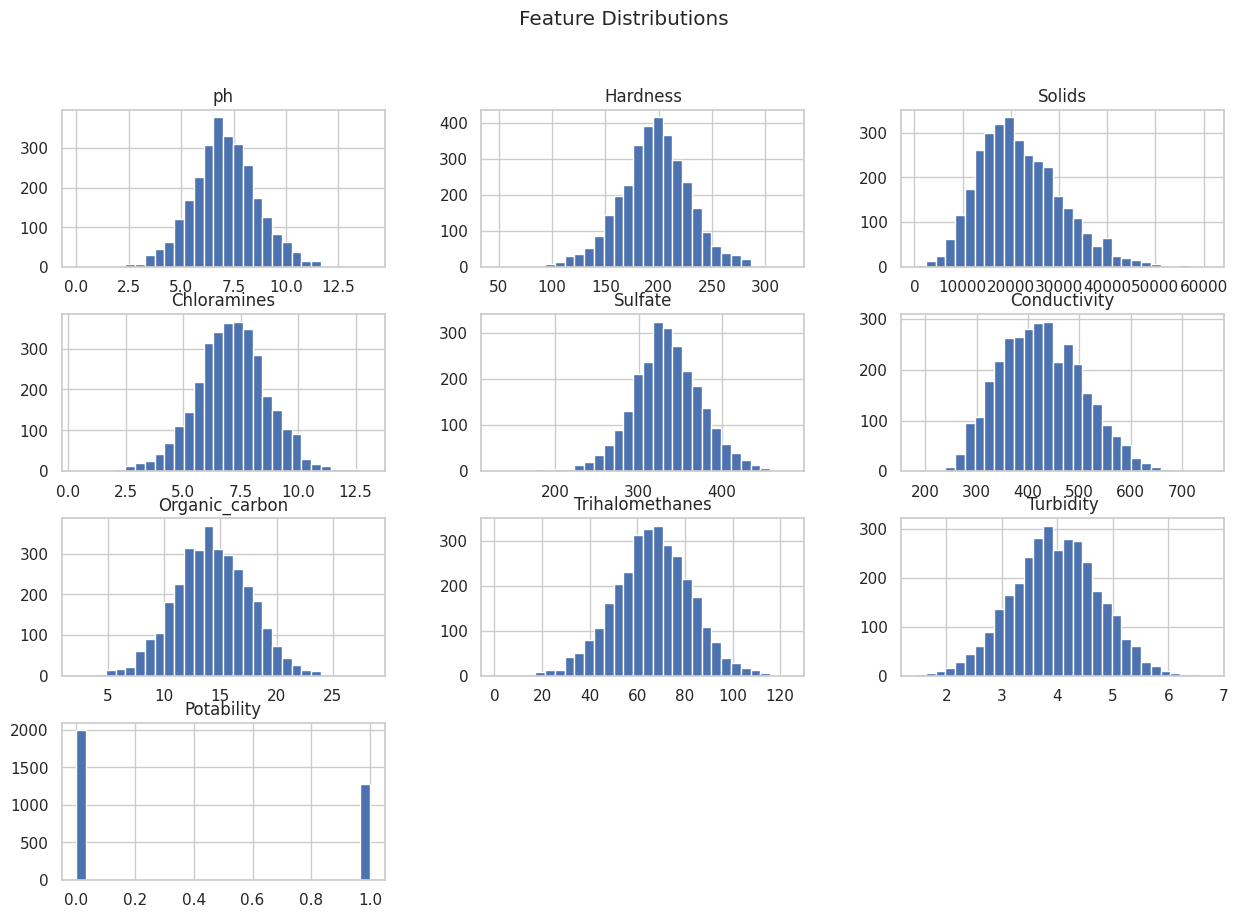

In [277]:
df.hist(bins=30, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

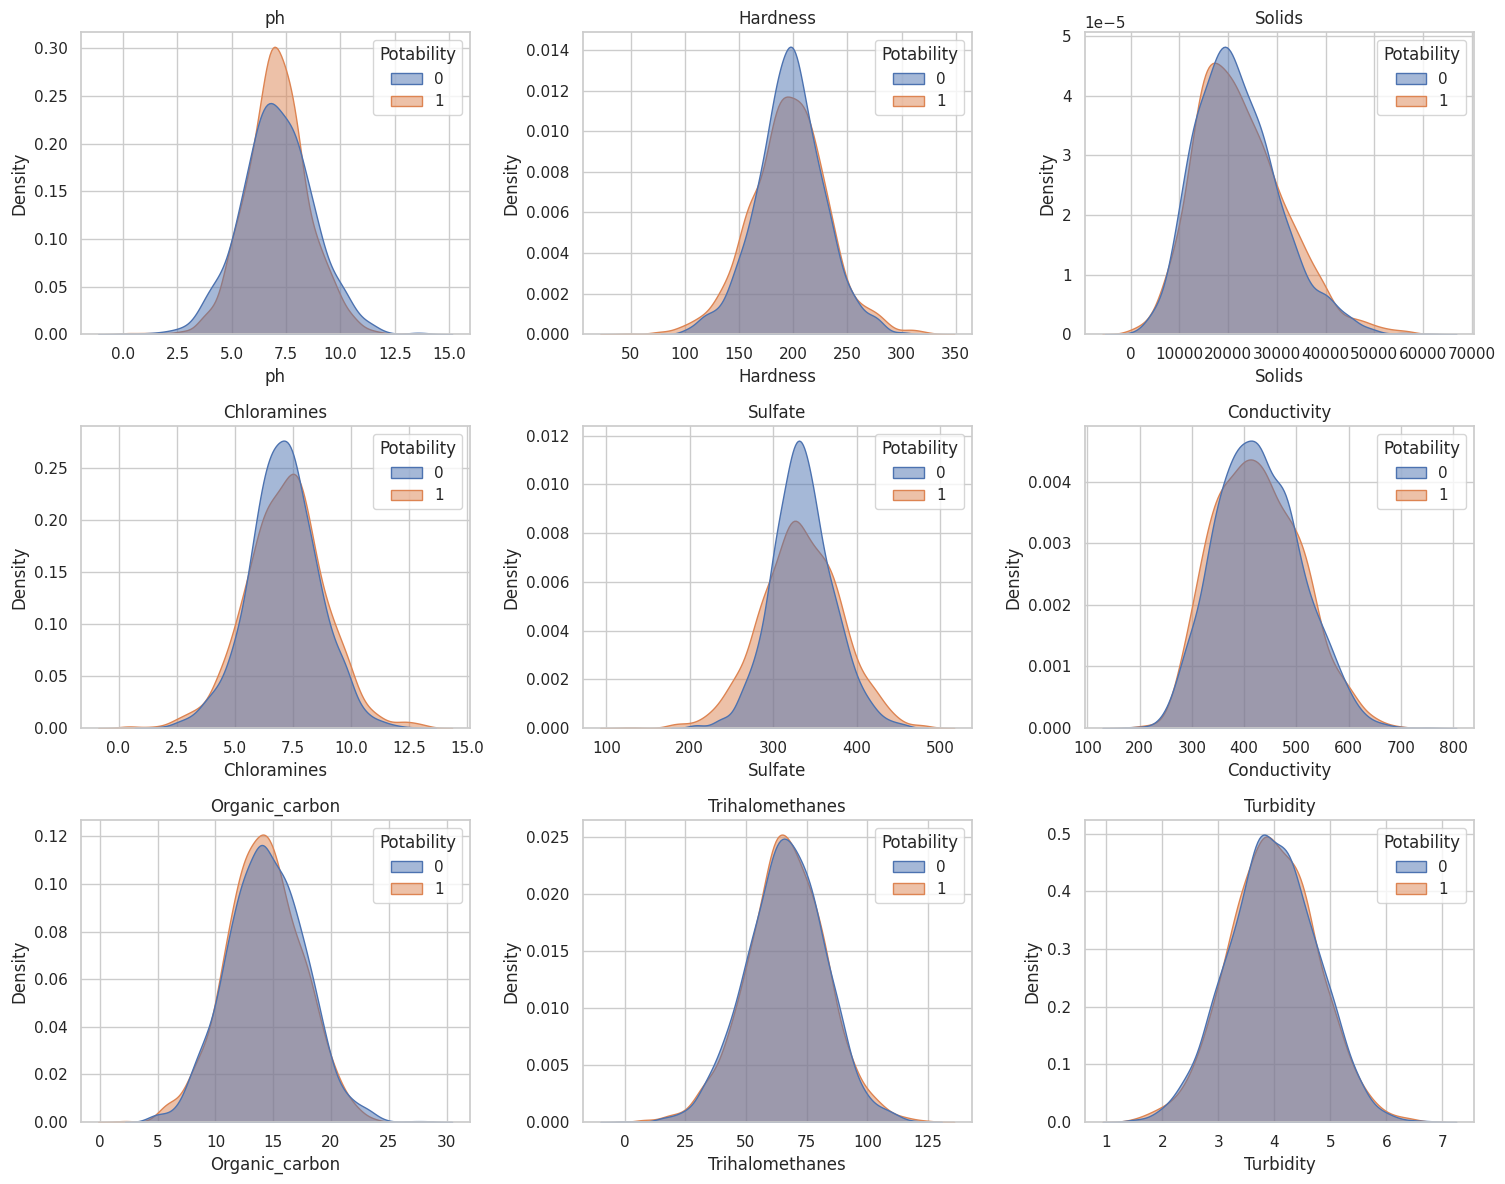

In [279]:
cols = df.columns[:-1]
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=df, x=col, hue="Potability", fill=True, common_norm=False, alpha=0.5)
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# --- Corelations between all features ---

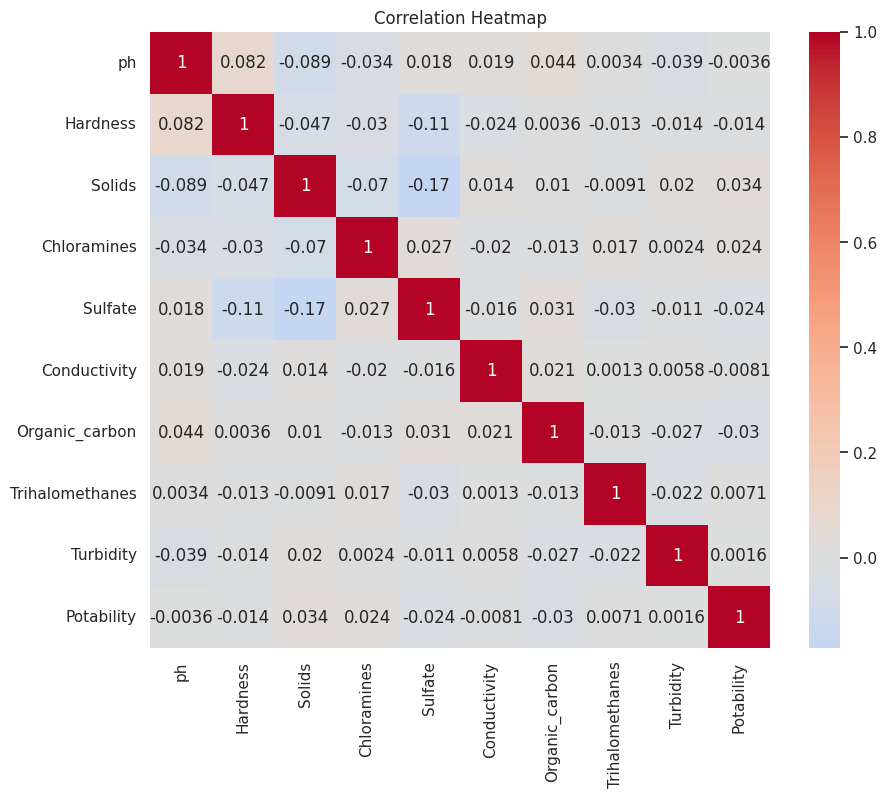

In [281]:
plt.figure(figsize=(10,8))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()



### **Exploratory Data Analysis and Missing Values**

*   We noticed that the dataset contains missing values in **pH, Sulfate, and Trihalomethanes**.  
Instead of dropping these rows, we used **KNN Imputer (k=5)** to fill missing values by averaging the nearest neighbors.This preserves natural patterns better than mean/median imputation.




# **3) Cleaning**

---


- Handle duplicates, missing values (if any)

In [282]:
# --- We have Nan Missing vlaues with 3 features. We will fill in the NaN values with KNN neighbors---

In [284]:
# --- Before fill in NaN values ---

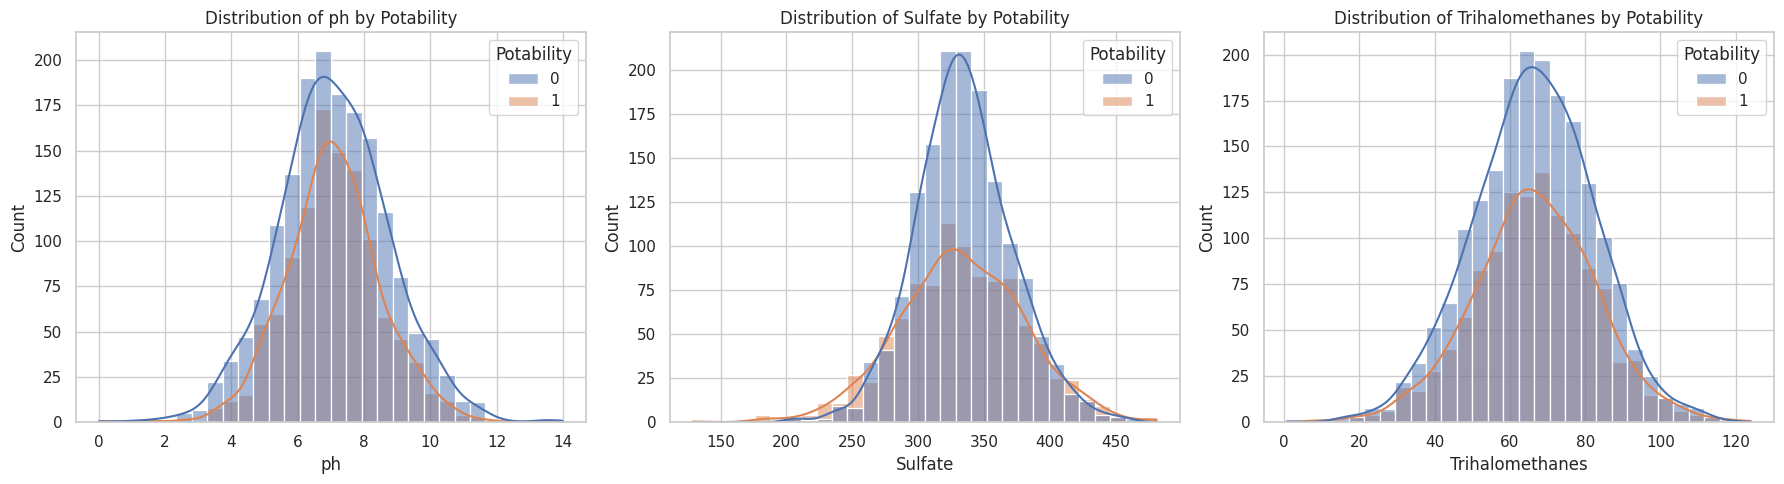

In [286]:
vars = ["ph", "Sulfate", "Trihalomethanes"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, var in zip(axes, vars):
    sns.histplot(data=df, x=var, hue="Potability", bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {var} by Potability")

plt.tight_layout()
plt.show()

In [288]:
# --- Fill the missing values (NaN) with KNN imputaion

*   We applied KNN imputaion (k=5) for missing values in pH, Sulfate, and
Trialomethanes becasue it preserves data distribution better than mean and median imputation.

In [289]:
imputer = KNNImputer(n_neighbors=5)
df[["ph","Sulfate","Trihalomethanes"]] = imputer.fit_transform(df[["ph","Sulfate","Trihalomethanes"]])


In [290]:
# --- After fill in NaN values ---

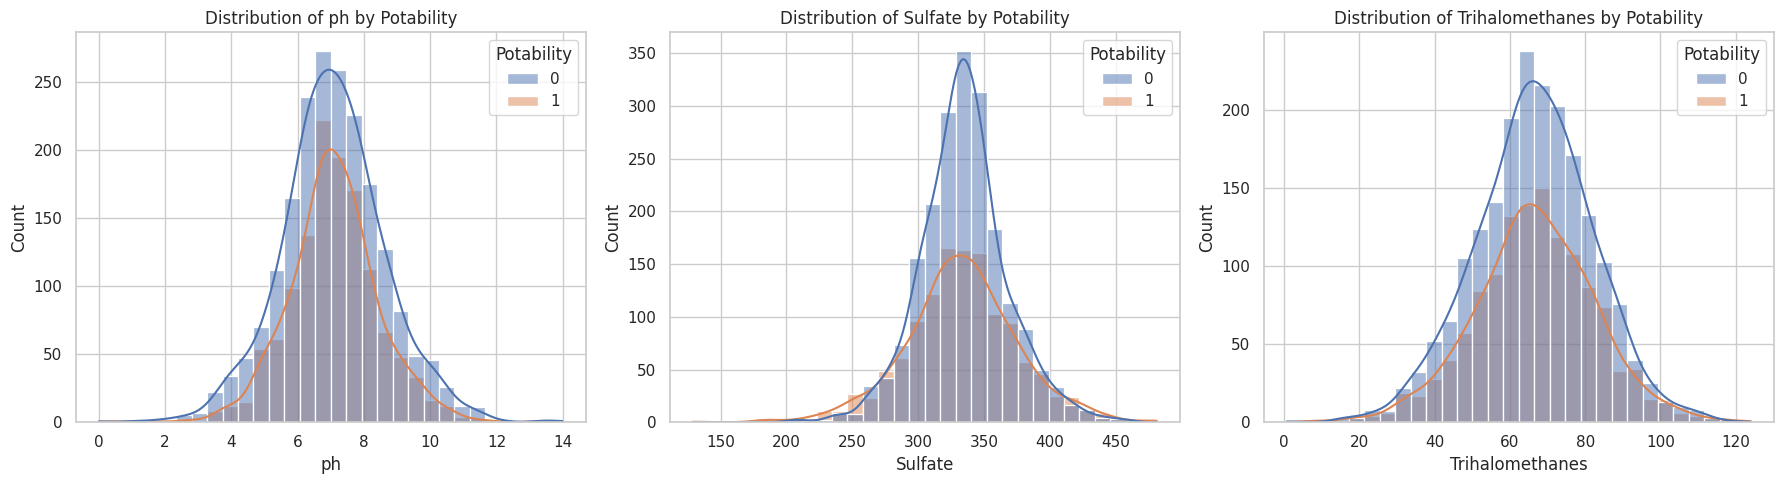

In [291]:
vars = ["ph", "Sulfate", "Trihalomethanes"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, var in zip(axes, vars):
    sns.histplot(data=df, x=var, hue="Potability", bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {var} by Potability")

plt.tight_layout()
plt.show()

In [292]:
df.isnull().values.any()

np.False_

In [293]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# **4) Train and Test Split**

---






- **Inputs (X):** 9 continuous features such as pH, Hardness, Solids, etc.
- **Target (y):** Potability (0 = unsafe, 1 = safe)

We split the dataset into training (80%) and testing (20%), stratified by class to keep the same distribution of safe/unsafe water in both sets.




In [294]:
# -----------------------------
# 1.Feature Engineering
# -----------------------------

X = df.drop("Potability", axis=1)
y = df["Potability"]

In [295]:
# Check shapes of features (X) and label (y)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3276, 9)
y shape: (3276,)


*   Remember when we plotted the target distribution: the dataset is imbalanced (≈61% unsafe vs ≈39% safe). To handle this, we applied SMOTE to oversample the minority class (safe water) so the models could learn to detect it better.

*   We applied only on the training set to generate synthetic safe water samples, balancing both classes equally.

In [296]:
# -----------------------------
# 3. Train/Test Split
# -----------------------------
from imblearn.over_sampling import SMOTE

# 1) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Before SMOTE:", X_train.shape, y_train.value_counts().to_dict())
print("After  SMOTE:", X_train_res.shape, y_train_res.value_counts().to_dict())

Train size: (2620, 9) Test size: (656, 9)
Before SMOTE: (2620, 9) {0: 1598, 1: 1022}
After  SMOTE: (3196, 9) {0: 1598, 1: 1598}


# **5) Classification models:**



---



We trained and compared four models:
- Logistic Regression (linear baseline)
- Decision Tree (non-linear baseline)
- Random Forest (ensemble of trees)
- XGBoost (gradient boosting, optimized for tabular data)

Each model was trained on the resampled training set and evaluated on the untouched test set.


In [299]:
# -------------------
# 1. Define Models
# -------------------

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

In [300]:
# -------------------
# 2. Evaluate the models
# -------------------

results = {}
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    results[name] = acc


 Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5442
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       400
           1       0.43      0.55      0.49       256

    accuracy                           0.54       656
   macro avg       0.54      0.55      0.54       656
weighted avg       0.57      0.54      0.55       656

Confusion Matrix:
[[215 185]
 [114 142]]

 Training Decision Tree...
Decision Tree Accuracy: 0.5991
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       400
           1       0.49      0.53      0.51       256

    accuracy                           0.60       656
   macro avg       0.58      0.59      0.58       656
weighted avg       0.61      0.60      0.60       656

Confusion Matrix:
[[257 143]
 [120 136]]

 Training Random Forest...
Random Forest Accuracy: 0.6418
Classification Report:
              precision    recall  f1-sc

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:32:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.5945
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       400
           1       0.48      0.48      0.48       256

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.59      0.59       656

Confusion Matrix:
[[267 133]
 [133 123]]


In [301]:
# -------------------
# 3. Compare Models
# -------------------

print("\n Model Comparison (Accuracy):")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


 Model Comparison (Accuracy):
Logistic Regression: 0.5442
Decision Tree: 0.5991
Random Forest: 0.6418
XGBoost: 0.5945


In [302]:
# -------------------
# 4. Select Best Model
# -------------------

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest model is: {best_model_name} with accuracy {results[best_model_name]:.4f}")


Best model is: Random Forest with accuracy 0.6418


## **Results and Model Comparison**

- **Logistic Regression**: Accuracy 0.54, predicts both classes but struggles due to non-linear feature interactions.
- **Decision Tree**: Accuracy 0.60, more balanced but prone to overfitting.
- **Random Forest**: Accuracy 0.64, best performance with balanced precision/recall for both classes.
- **XGBoost**: Accuracy 0.59, moderate but requires tuning for better performance.

**Conclusion**: Random Forest is the most reliable model for deployment.

# **6) Model Saving for Deployment**

---





We save the best model (Random Forest) along with feature metadata:

- `model.joblib` : trained model pipeline
- `model_meta.json` : list of input features and preprocessing details


In [303]:
Path("best_model").mkdir(exist_ok=True)

# Refit best model on full training set (with SMOTE applied)
best_model.fit(X_train_res, y_train_res)

# Save model
joblib.dump(best_model, "best_model/model.joblib")

# Save metadata (feature names, target, imputation method)
meta = {
    "feature_names": list(X.columns),
    "target": "Potability",
    "imputer": "KNNImputer(n_neighbors=5)",
    "balancing": "SMOTE"
}
with open("best_model/model_meta.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, indent=4)

print(" Model and metadata saved in best_model/")

 Model and metadata saved in best_model/




---


## **Further Reading**


---



Documentation can and more examples can be found here: https://scikit-learn.org/stable/auto_examples/index.html#classification

More information about the dataset can be found here: https://github.com/allisonhorst/palmerpenguins